Data Preparation & Feature Extraction

In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import pickle as pkl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [34]:
# Loading the datasets
from google.colab import drive
drive.mount('/content/drive')
# Loading the datasets
train_df = pd.read_csv('/content/drive/My Drive/regression files/male_players (legacy).csv', low_memory=False)
test_df = pd.read_csv("/content/drive/My Drive/regression files/players_22.csv", low_memory=False)


Mounted at /content/drive


In [35]:

train_df.head()

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,158023,/player/158023/lionel-messi/150002,15,2,2014-09-18,L. Messi,Lionel Andrés Messi Cuccittini,CF,93,95,...,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,15+3,https://cdn.sofifa.net/players/158/023/15_120.png
1,20801,/player/20801/c-ronaldo-dos-santos-aveiro/150002,15,2,2014-09-18,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",92,92,...,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,16+3,https://cdn.sofifa.net/players/020/801/15_120.png
2,9014,/player/9014/arjen-robben/150002,15,2,2014-09-18,A. Robben,Arjen Robben,"RM, LM, RW",90,90,...,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,14+3,https://cdn.sofifa.net/players/009/014/15_120.png
3,41236,/player/41236/zlatan-ibrahimovic/150002,15,2,2014-09-18,Z. Ibrahimović,Zlatan Ibrahimović,ST,90,90,...,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,17+3,https://cdn.sofifa.net/players/041/236/15_120.png
4,167495,/player/167495/manuel-neuer/150002,15,2,2014-09-18,M. Neuer,Manuel Peter Neuer,GK,90,90,...,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3,87+3,https://cdn.sofifa.net/players/167/495/15_120.png


In [36]:

# Dropping irrelevant columns
irrelevant_cols = ['player_url','short_name','long_name','player_face_url','fifa_version','fifa_update','value_eur',
                   'wage_eur','fifa_update_date','league_id','dob','club_team_id','club_name','club_position',
                   'club_jersey_number','club_loaned_from','club_joined_date','club_contract_valid_until_year',
                   'nationality_id','nationality_name','nation_team_id','nation_position','nation_jersey_number',
                   'real_face','release_clause_eur','league_name','league_level']
train_df.drop(irrelevant_cols, axis=1, inplace=True)


In [37]:
train_df

,player_id,player_positions,overall,potential,age,height_cm,weight_kg,preferred_foot,weak_foot,skill_moves,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,158023,CF,93,95,27,169,67,Left,3,4,...,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,15+3
1,20801,"LW, LM",92,92,29,185,80,Right,4,5,...,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,16+3
2,9014,"RM, LM, RW",90,90,30,180,80,Left,2,4,...,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,14+3
3,41236,ST,90,90,32,195,95,Right,4,4,...,65+3,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,17+3
4,167495,GK,90,90,28,193,92,Right,4,1,...,40+3,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3,87+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161578,269011,RW,46,61,18,180,73,Right,3,2,...,32+2,32+2,32+2,37+2,36+2,31+2,31+2,31+2,36+2,14+2
161579,269019,LB,46,58,19,188,83,Left,3,2,...,41+2,41+2,41+2,43+2,44+2,48+2,48+2,48+2,44+2,15+2
161580,271093,CDM,46,58,19,181,73,Right,2,2,...,45+2,45+2,45+2,47+2,47+2,46+2,46+2,46+2,47+2,14+2
161581,271555,"RW, LW",46,70,17,175,68,Right,3,2,...,30+2,30+2,30+2,34+2,32+2,28+2,28+2,28+2,32+2,15+2


In [38]:

# Fill missing values
numeric_cols = train_df.select_dtypes(include=np.number).columns
train_df[numeric_cols] = train_df[numeric_cols].fillna(train_df[numeric_cols].mean())


In [39]:
train_df

,player_id,player_positions,overall,potential,age,height_cm,weight_kg,preferred_foot,weak_foot,skill_moves,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,158023,CF,93,95,27,169,67,Left,3,4,...,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,15+3
1,20801,"LW, LM",92,92,29,185,80,Right,4,5,...,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,16+3
2,9014,"RM, LM, RW",90,90,30,180,80,Left,2,4,...,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,14+3
3,41236,ST,90,90,32,195,95,Right,4,4,...,65+3,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,17+3
4,167495,GK,90,90,28,193,92,Right,4,1,...,40+3,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3,87+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161578,269011,RW,46,61,18,180,73,Right,3,2,...,32+2,32+2,32+2,37+2,36+2,31+2,31+2,31+2,36+2,14+2
161579,269019,LB,46,58,19,188,83,Left,3,2,...,41+2,41+2,41+2,43+2,44+2,48+2,48+2,48+2,44+2,15+2
161580,271093,CDM,46,58,19,181,73,Right,2,2,...,45+2,45+2,45+2,47+2,47+2,46+2,46+2,46+2,47+2,14+2
161581,271555,"RW, LW",46,70,17,175,68,Right,3,2,...,30+2,30+2,30+2,34+2,32+2,28+2,28+2,28+2,32+2,15+2


In [40]:
numeric_cols

Index(['player_id', 'overall', 'potential', 'age', 'height_cm', 'weight_kg',
       'weak_foot', 'skill_moves', 'international_reputation', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 

In [41]:


# Feature selection based on correlation
numeric_cols = train_df.select_dtypes(include=['number']).columns
corr_matrix = train_df[numeric_cols].corr()
corr_threshold = 0.5
high_corr_features = [col for col in corr_matrix.columns if abs(corr_matrix['overall'][col]) > corr_threshold]


In [42]:

print(high_corr_features)

['overall', 'potential', 'passing', 'dribbling', 'movement_reactions', 'mentality_composure']


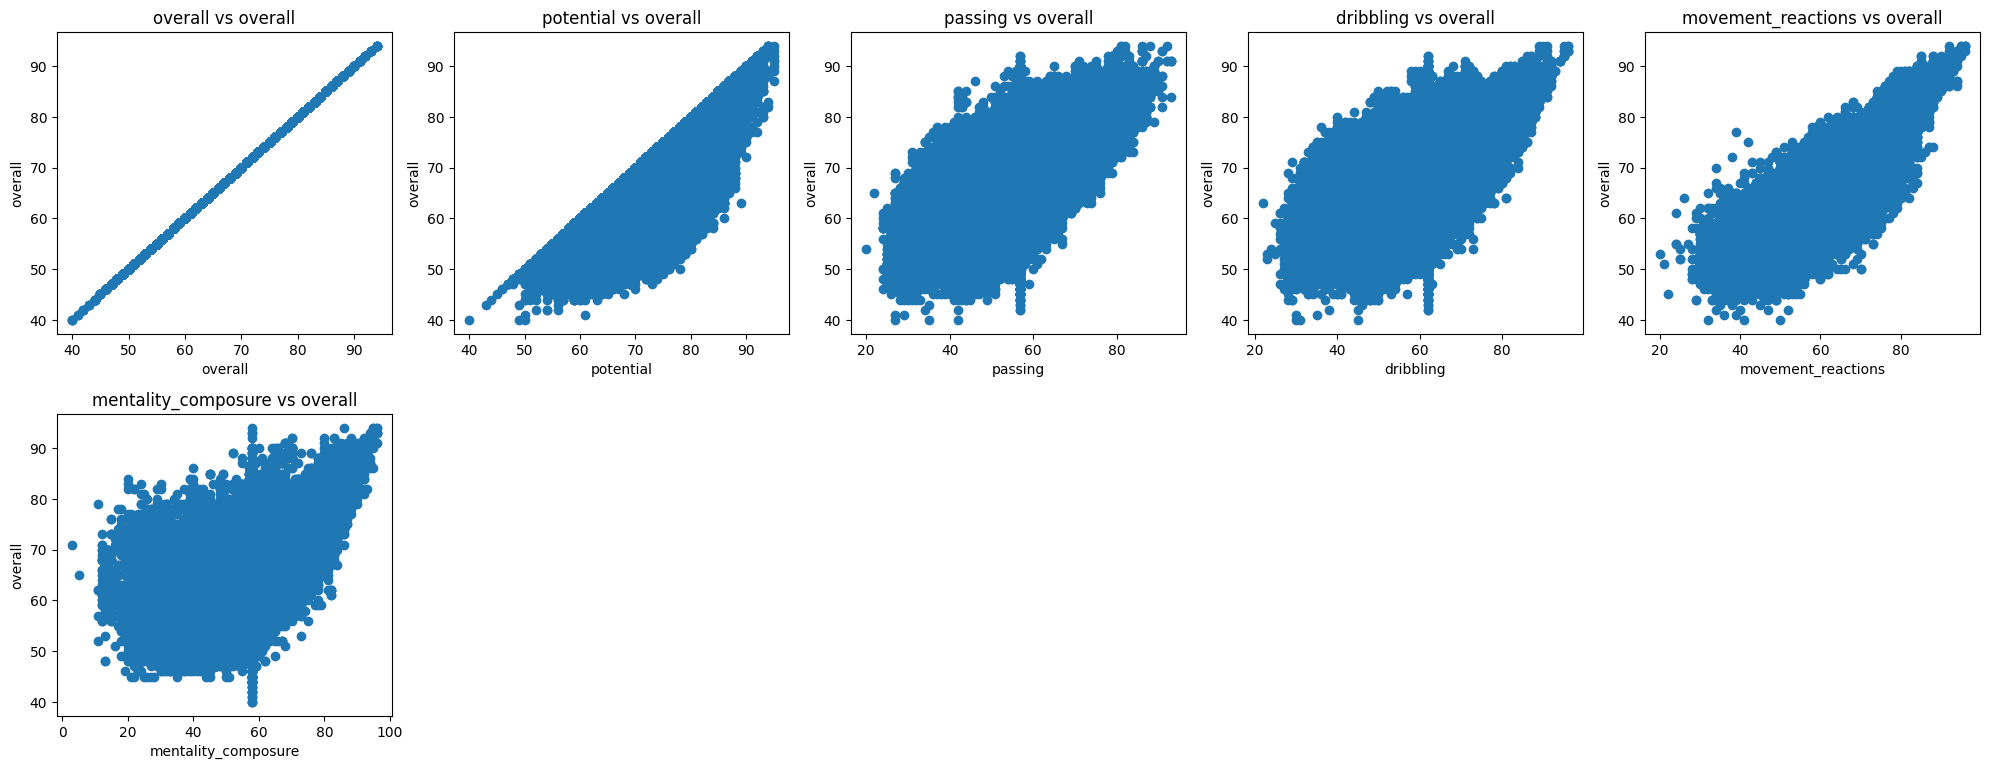

In [43]:
#data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plots of high correlation features against 'overall'
plt.figure(figsize=(20, 15))
for i, feature in enumerate(high_corr_features):
    plt.subplot(4, 5, i+1)
    plt.scatter(train_df[feature], train_df['overall'])
    plt.xlabel(feature)
    plt.ylabel('overall')
    plt.title(f'{feature} vs overall')
plt.tight_layout()
plt.show()

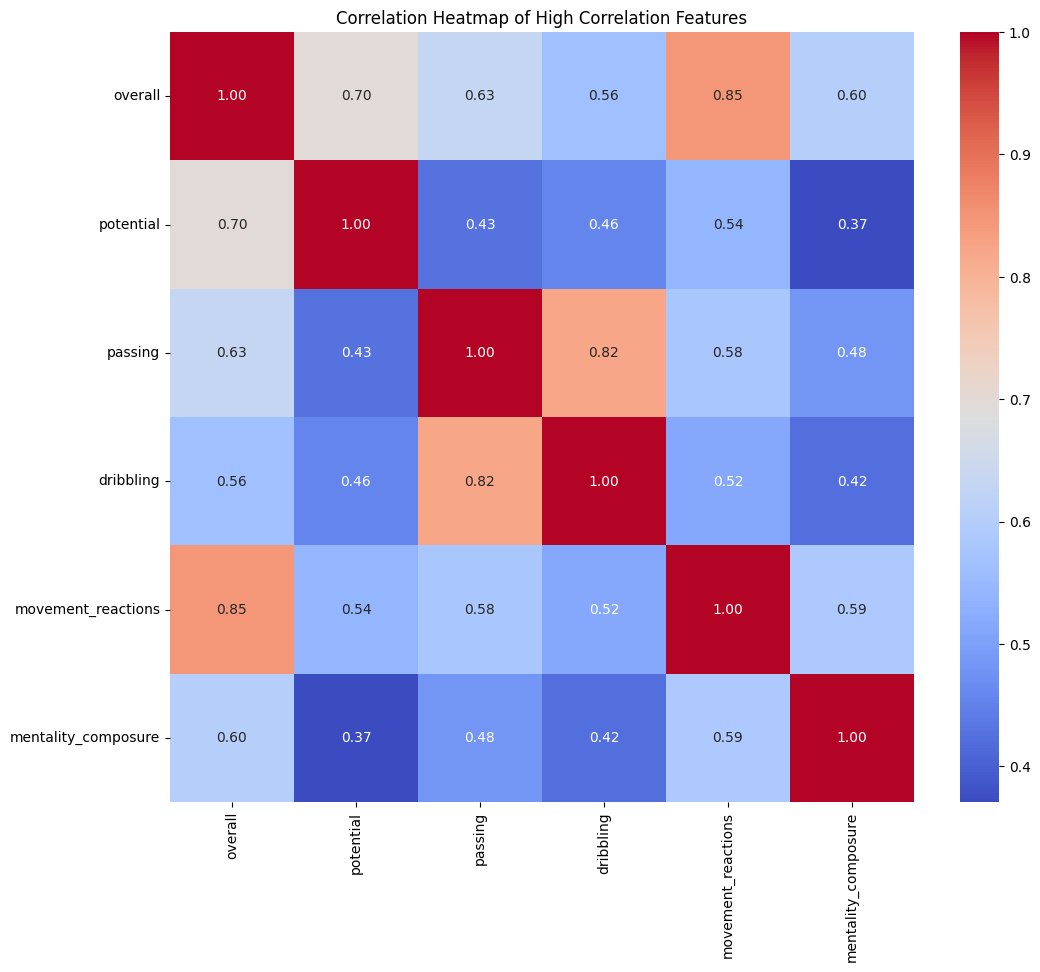

In [44]:
plt.figure(figsize=(12, 10))
sns.heatmap(train_df[high_corr_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of High Correlation Features')
plt.show()

In [45]:
train_df

,player_id,player_positions,overall,potential,age,height_cm,weight_kg,preferred_foot,weak_foot,skill_moves,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,158023,CF,93,95,27,169,67,Left,3,4,...,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,15+3
1,20801,"LW, LM",92,92,29,185,80,Right,4,5,...,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,16+3
2,9014,"RM, LM, RW",90,90,30,180,80,Left,2,4,...,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,14+3
3,41236,ST,90,90,32,195,95,Right,4,4,...,65+3,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,17+3
4,167495,GK,90,90,28,193,92,Right,4,1,...,40+3,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3,87+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161578,269011,RW,46,61,18,180,73,Right,3,2,...,32+2,32+2,32+2,37+2,36+2,31+2,31+2,31+2,36+2,14+2
161579,269019,LB,46,58,19,188,83,Left,3,2,...,41+2,41+2,41+2,43+2,44+2,48+2,48+2,48+2,44+2,15+2
161580,271093,CDM,46,58,19,181,73,Right,2,2,...,45+2,45+2,45+2,47+2,47+2,46+2,46+2,46+2,47+2,14+2
161581,271555,"RW, LW",46,70,17,175,68,Right,3,2,...,30+2,30+2,30+2,34+2,32+2,28+2,28+2,28+2,32+2,15+2


In [46]:

# Creating feature subsets
feature_subsets = [high_corr_features[:i] for i in range(1, len(high_corr_features) + 1)]


In [47]:
print(feature_subsets)


[['overall'], ['overall', 'potential'], ['overall', 'potential', 'passing'], ['overall', 'potential', 'passing', 'dribbling'], ['overall', 'potential', 'passing', 'dribbling', 'movement_reactions'], ['overall', 'potential', 'passing', 'dribbling', 'movement_reactions', 'mentality_composure']]


In [48]:

# Select the best subset for training
selected_features = feature_subsets[-1]
print("Selected Features:", selected_features)


Selected Features: ['overall', 'potential', 'passing', 'dribbling', 'movement_reactions', 'mentality_composure']


model training and evaluation

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [50]:

# Split the data
X = train_df[selected_features]
y = train_df['overall']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [51]:
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

(129266, 6) (129266,) (32317, 6) (32317,)


In [52]:
print("Training Data Description:\n", X_train.describe())
print("Validation Data Description:\n", X_val.describe())
print("Training Target Description:\n", y_train.describe())
print("Validation Target Description:\n", y_val.describe())

Training Data Description:
              overall      potential        passing      dribbling  \
count  129266.000000  129266.000000  129266.000000  129266.000000   
mean       65.695403      70.728034      56.947879      62.076121   
std         7.041030       6.265285       9.884409       9.716687   
min        40.000000      40.000000      20.000000      22.000000   
25%        61.000000      66.000000      51.000000      57.000000   
50%        66.000000      70.000000      56.938175      62.081872   
75%        70.000000      75.000000      63.000000      68.000000   
max        94.000000      95.000000      93.000000      96.000000   

       movement_reactions  mentality_composure  
count       129266.000000        129266.000000  
mean            61.581754            57.800019  
std              9.164692            11.003735  
min             20.000000             3.000000  
25%             55.000000            53.000000  
50%             62.000000            57.816892  
75%    

In [53]:
print(y_val,X_val)

9061      63
154203    64
149642    68
136295    63
74878     69
          ..
143827    78
135022    64
84969     56
26538     63
14334     55
Name: overall, Length: 32317, dtype: int64         overall  potential  passing  dribbling  movement_reactions  \
9061         63         76     70.0       65.0                  63   
154203       64         67     54.0       68.0                  60   
149642       68         71     63.0       70.0                  65   
136295       63         65     48.0       48.0                  55   
74878        69         85     66.0       76.0                  67   
...         ...        ...      ...        ...                 ...   
143827       78         78     63.0       58.0                  74   
135022       64         64     59.0       64.0                  63   
84969        56         67     52.0       60.0                  48   
26538        63         67     64.0       65.0                  62   
14334        55         74     48.0       54

In [54]:

# Models to train
models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42))
]


In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler  # Import for scaling
from sklearn.linear_model import Lasso, Ridge  # Import for regularization


In [56]:


for model_name, model in models:
  # Check for constant target variable
  if np.unique(y_train).shape[0] == 1:
    print(f"{model_name}: Skipping model - Target variable has only one unique value.")
    continue


In [57]:

  # Standardize features
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_val_scaled = scaler.transform(X_val)


In [58]:

  # regularization technique (Lasso)
  model = Lasso(alpha=0.1)


In [59]:

  # Perform cross-validation
  scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')
  model.fit(X_train_scaled, y_train)
  y_pred = model.predict(X_val_scaled)


In [60]:

  # Debug statements
  print(f'{model_name} Predictions: {np.unique(y_pred)}')


Gradient Boosting Predictions: [44.30812946 45.29392693 46.27972441 47.26552189 48.25131937 49.23711684
 50.22291432 51.2087118  52.19450928 53.18030675 54.16610423 55.15190171
 56.13769919 57.12349666 58.10929414 59.09509162 60.08088909 61.06668657
 62.05248405 63.03828153 64.024079   65.00987648 65.99567396 66.98147144
 67.96726891 68.95306639 69.93886387 70.92466134 71.91045882 72.8962563
 73.88205378 74.86785125 75.85364873 76.83944621 77.82524369 78.81104116
 79.79683864 80.78263612 81.76843359 82.75423107 83.74002855 84.72582603
 85.7116235  86.69742098 87.68321846 88.66901594 89.65481341 90.64061089
 91.62640837 92.61220585 93.59800332]


In [61]:

  # Calculate metrics
  mae = mean_absolute_error(y_val, y_pred)
  mse = mean_squared_error(y_val, y_pred)
  cv_score = -np.mean(scores)


In [62]:
print(mae,mse,cv_score)

0.07908251340431144 0.009997610728700914 0.0790443274760317


In [63]:

  # Check for potential overfitting (high R-squared)
  r2 = model.score(X_train_scaled, y_train)
  if r2 > 0.95:
    print(f": {model_name} - High R-squared ({r2:.3f})  potential overfitting is regulated with lasso ridge.")


: Gradient Boosting - High R-squared (1.000)  potential overfitting is regulated with lasso ridge.


In [64]:

  print(f'{model_name}: MAE={mae:.3f}, MSE={mse:.3f}, Cross-Validation Score={cv_score:.3f}')

Gradient Boosting: MAE=0.079, MSE=0.010, Cross-Validation Score=0.079


In [65]:
print("Overall Column Description:\n", train_df['overall'].describe())

Overall Column Description:
 count    161583.000000
mean         65.699071
std           7.040855
min          40.000000
25%          61.000000
50%          66.000000
75%          70.000000
max          94.000000
Name: overall, dtype: float64


In [66]:

# Hyperparameter tuning for the best model (e.g., Random Forest)
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestRegressor(random_state=42)
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=3, random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42)

In [67]:
cv_results = rf_random.cv_results_
# Access the correct key for mean cross-validation score
mean_val_score = cv_results['mean_test_score'].mean()

# calculate training scores separately using cross_val_score
from sklearn.model_selection import cross_val_score
train_scores = cross_val_score(rf_random.best_estimator_, X_train, y_train, cv=3)
mean_train_score = train_scores.mean()

if mean_train_score - mean_val_score > 0.1:
  print("Potential overfitting detected based on cross-validation scores.")

# Check for trivial predictions
if np.unique(y_pred).shape[0] == 1:
  print(f"All predictions are the same. Model does show learning patterns.")

In [68]:

best_rf = rf_random.best_estimator_
y_pred = best_rf.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
print(f'Optimized Random Forest: MAE={mae}, MSE={mse}')


Optimized Random Forest: MAE=2.135099173809399e-05, MSE=5.5172200389887385e-06


In [69]:
best_rf = rf_random.best_estimator_
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_rf, f)

In [70]:
!pip install pyngrok
from pyngrok import ngrok
import subprocess

In [71]:
!choco install ngrok

/bin/bash: line 1: choco: command not found


In [72]:
import pickle

# Save the best estimator
best_rf = rf_random.best_estimator_
with open('/content/drive/My Drive/regression files/best_model.pkl', 'wb') as f:
    pickle.dump(best_rf, f)

In [75]:
features = ['height', 'weight', 'pace', 'shooting', 'passing', 'dribbling']


deployment on streamlit

In [77]:
from pyngrok import ngrok
import subprocess

# Install streamlit and pyngrok
!pip install streamlit
!pip install pyngrok

# Save the Streamlit app code to a file
with open('app.py', 'w') as f:
    f.write("""
import streamlit as st
import numpy as np
import pickle

st.title('Player Rating Prediction')
st.markdown("Predict a player's overall rating based on their profile")

# Load the model
model = None
try:
    with open('/content/drive/My Drive/regression files/best_model.pkl', 'rb') as f:
        model = pickle.load(f)
except FileNotFoundError:
    st.error('Model file not found. Please ensure best_model.pkl is in the current directory.')
except EOFError:
    st.error('Model file is empty or corrupted.')

# Collect user input
height = st.slider('Height (cm)', 150, 200, 175)
weight = st.slider('Weight (kg)', 50, 100, 75)
pace = st.slider('Pace', 1, 100, 50)
shooting = st.slider('Shooting', 1, 100, 50)
passing = st.slider('Passing', 1, 100, 50)   # Add the missing feature
dribbling = st.slider('Dribbling', 1, 100, 50)  # Add the missing feature

# Predict function
def predict(data, model):
    prediction = model.predict(data)
    return prediction

if st.button('Predict Rating'):
    if model is not None:
        input_data = np.array([[height, weight, pace, shooting, passing, dribbling]])  # Include all features
        result = predict(input_data, model)
        st.text(f'Predicted Rating: {result[0]:.2f}')
        # Since Random Forest doesn't provide a confidence score, we can use std deviation of trees predictions
        confidence = np.std([tree.predict(input_data) for tree in model.estimators_])
        st.text(f'Confidence Score: {confidence:.2f}')
    else:
        st.error('Model not loaded. Prediction cannot be made.')
""")

# Terminate any existing ngrok processes
ngrok.kill()  # Close any existing ngrok tunnels

# Use the authtoken to authenticate your ngrok session
# Replace 'your_authtoken' with your actual authtoken from ngrok dashboard
ngrok.set_auth_token('2iG11e55QIE4WCvza9kIihRcEvH_5hZW8RXCQ8x3skQsHCrwD')

# Check for existing tunnels before creating a new one
tunnels = ngrok.get_tunnels()
if not tunnels:  # If no active tunnels, create a new one
    url = ngrok.connect(8501)
    print(f'Streamlit app running at: {url}')
else:
    # Disconnect existing tunnel before creating a new one
    ngrok.disconnect(tunnels[0].public_url)
    url = ngrok.connect(8501)
    print(f'Streamlit app running at: {url}')

# Start the Streamlit app
proc = subprocess.Popen(['streamlit', 'run', 'app.py'])

Streamlit app running at: NgrokTunnel: "https://21d6-35-221-50-80.ngrok-free.app" -> "http://localhost:8501"
